In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Интересующие атрибуты - "Time" и "Amount". Атрибут "Time" указывает время, прошедшее между транзакциями, атрибут "Amount" - сумму транзакций (так написано на сайте)

In [4]:
df.isnull().sum().max() #Поиск нулевых значений

0

In [5]:
duplicates = df.drop_duplicates()
print("Удалено", len(df) - len(df.drop_duplicates()), "дубликатов")

Удалено 1081 дубликатов


In [6]:

print("Число мошеннических переводов составляет", 100*(df.Class.value_counts()[1] / df.shape[0]), "% от всего числа транзакций")

Число мошеннических переводов составляет 0.1727485630620034 % от всего числа транзакций


В первом приближении мошенников всего 0.17% , что говорит о  сильной несбалансированности классов

In [7]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


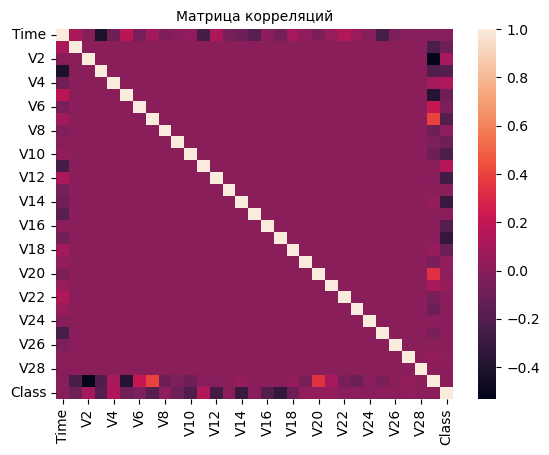

In [8]:
sns.heatmap(df.corr())
plt.title("Матрица корреляций", fontsize=10)
plt.show()
     

Таблица и тепловая карта показывают некоторую зависимость между V1-V28, однако "Time" и "Amount" не кореллируют явно с целевым классом

In [9]:
df['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

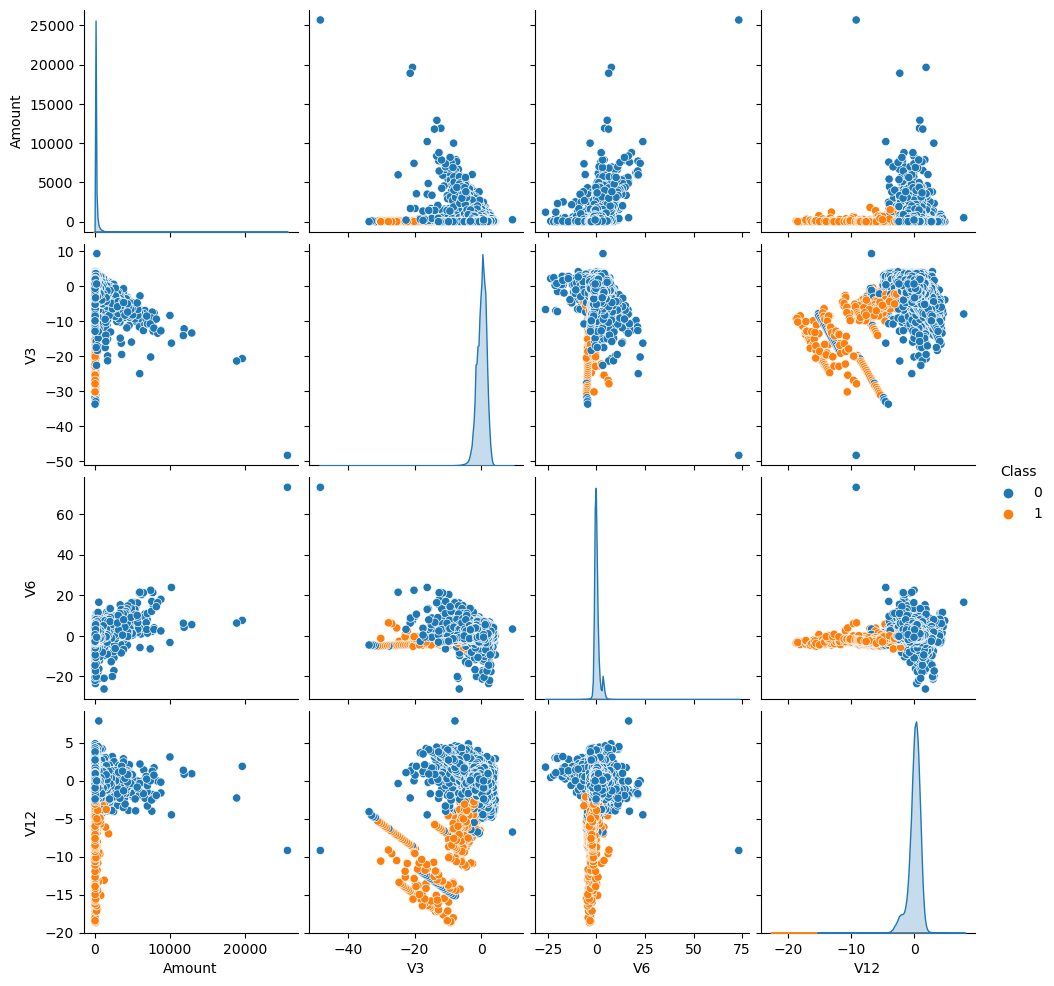

In [13]:
selected_features = ['Amount', 'V3', 'V6', 'V12']
data_subset = df[selected_features + ['Class']]
sns.pairplot(data_subset, hue='Class', diag_kind='kde')
plt.show()

Данные разделяются нелинейно. Разделим тренировочную и тестовую выборки

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop(['Class'], axis=1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

print(f"В тренировочной выборке мошеннических транзакций {y_train.value_counts()[1] / y_train.shape[0] * 100}", "%")
print(f"В тестовой выборке мошеннических транзакций {y_test.value_counts()[1] / y_test.shape[0] * 100}", "%")
     

В тренировочной выборке мошеннических транзакций 0.17293784718582958 %
В тестовой выборке мошеннических транзакций 0.17236426314277506 %


Сравним тренировочную и тестовую выборки

In [11]:
X_train.describe() - X_test.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,96833.000000,96833.000000,96833.000000,96833.000000,96833.000000,96833.000000,96833.000000,96833.000000,96833.000000,96833.000000,...,96833.000000,96833.000000,96833.000000,96833.000000,96833.000000,96833.000000,96833.000000,96833.000000,96833.000000,96833.000000
mean,488.420455,-0.001373,-0.005390,-0.010034,0.004290,0.004654,-0.000375,-0.002074,-0.002150,0.008867,...,-0.004248,0.003058,0.001542,0.001078,0.000375,-0.001499,0.000686,-0.001918,0.000655,-0.285138
std,-7.660029,0.014596,-0.001395,0.013710,0.001101,0.009505,0.007103,0.024203,-0.005652,-0.000120,...,0.020482,0.011440,-0.000142,-0.001271,-0.001693,0.001219,0.000655,0.012813,-0.022179,7.339328
min,-1.000000,9.552462,9.371029,-15.871391,-0.082564,-73.315580,4.231194,-10.317913,-22.273350,-2.591540,...,-26.488085,-12.072842,-2.046127,-11.978740,-0.011778,-1.598770,-0.749195,-12.719872,-7.017817,0.000000
25%,371.500000,0.003571,-0.003807,-0.009073,0.009034,0.003003,-0.001132,0.001021,0.000428,0.009845,...,-0.000919,0.000777,0.002077,-0.000486,0.000504,0.000753,0.000011,0.000264,-0.000050,0.130000
50%,549.500000,0.005161,-0.005227,-0.002703,0.002834,0.000557,-0.000909,0.001805,0.001023,0.005262,...,-0.001398,0.001998,0.000278,0.001598,0.000649,-0.001250,0.000455,-0.000153,-0.000167,0.010000
75%,333.500000,0.000219,0.001966,-0.009575,0.003357,0.001404,-0.000573,0.003333,-0.001581,0.012915,...,-0.000694,0.000686,0.000060,0.000750,-0.001639,-0.001727,0.002114,-0.000406,-0.001021,0.670000
max,6.000000,-0.003042,4.127179,5.156450,0.384127,-1.890204,49.383788,76.535033,1.725041,6.322619,...,13.183513,0.000000,2.230857,-0.444867,0.561683,-1.448738,0.398051,21.104314,-17.905657,12780.230000


In [12]:

from sklearn.preprocessing import StandardScaler
standarts = StandardScaler()
standarts.fit(X_train)


X_train_standarts = pd.DataFrame(data=standarts.transform(X_train), columns=standarts.get_feature_names_out())
X_test_standarts = pd.DataFrame(data=standarts.transform(X_test), columns=standarts.get_feature_names_out())

In [13]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    accuracy_score,
)


def evaluate(model, conf_matrix=True, return_=False):
    y_pred = model.predict(X_test_standarts)
    cm = confusion_matrix(y_test, y_pred)
    tp = cm[0, 0]
    tn = cm[1, 1]
    fp = cm[0, 1]
    fn = cm[1, 0]

    if conf_matrix:
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            cbar=False,
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"],
        )
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

    print(classification_report(y_test, y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"ROC-AUC: {roc_auc:.3f}")

    model_name = str(type(model).__name__)


    if return_:
        metrics_dict = {
            "Model": model_name,
            "accuracy": round(accuracy, 3),
            "precision": round(precision, 3),
            "recall": round(recall, 3),
            "f1": round(f1, 3),
            "roc_auc": round(roc_auc, 3),
            "tp": tp,
            "tn": tn,
            "fp": fp,
            "fn": fn,
        }
        return metrics_dict

**Логическая Регрессия**

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  precision_score, recall_score, precision_recall_curve, confusion_matrix, PrecisionRecallDisplay
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train_standarts, y_train)
y_pred = lr.predict(X_test_standarts)

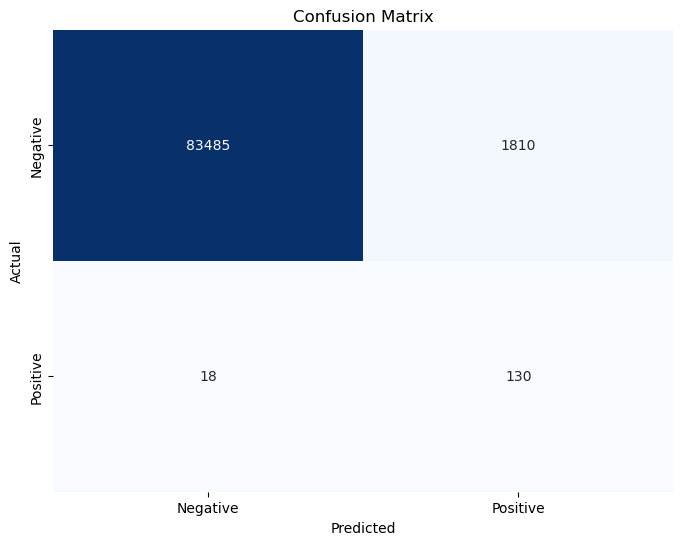

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy: 0.979
Precision: 0.067
Recall: 0.878
F1-Score: 0.125
ROC-AUC: 0.929


In [23]:
evaluate(lr)

Recall имеет высокие параметры, однако точность класса 1 всего 0.07, модель смогла выбрать только 7% значений из Класса 1. 

Попробуем модель "Случайного леса", за счет большого числа данных он должен выдать лучший результат  
  
    
__Случайный лес__

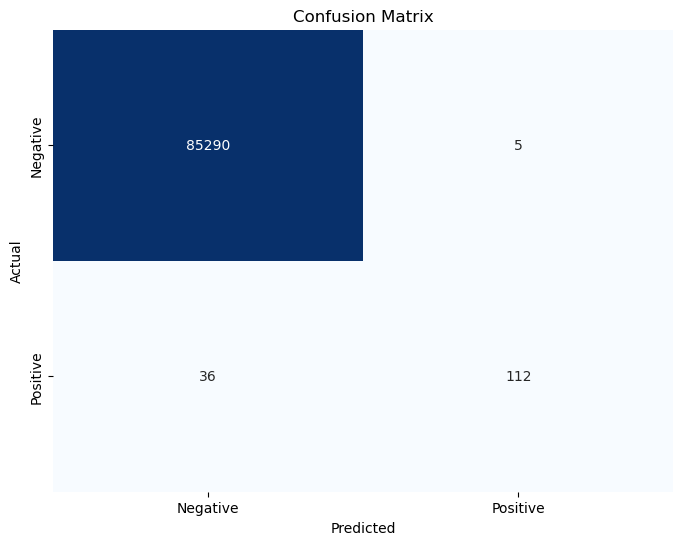

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 1.000
Precision: 0.957
Recall: 0.757
F1-Score: 0.845
ROC-AUC: 0.878


In [20]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop(['Class'], axis = 1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
standarts = StandardScaler()
standarts.fit(X_train)

X_train_standarts = pd.DataFrame(data=standarts.transform(X_train), columns=standarts.get_feature_names_out())
X_test_standarts = pd.DataFrame(data=standarts.transform(X_test), columns=standarts.get_feature_names_out())

RF = RandomForestClassifier(random_state=42, n_jobs=-1)
RF.fit(X_train_standarts, y_train);
y_pred = RF.predict(X_test_standarts)

evaluate(RF)

Уже лучше. Точность 96% полнота 76% класса 1. Рассмотрим еще несколько прикольных моделей которые описаны на сайте

__Доработка домашки__ Модель SVM (для удобства рассчитываю линейную модель, полная SVC считалась больше 50 минут, затем не получилось ее семплировать)

In [ ]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(random_state=42)
linear_svc.fit(X_train_standarts, y_train)
y_pred = linear_svc.predict(X_test_standarts)    

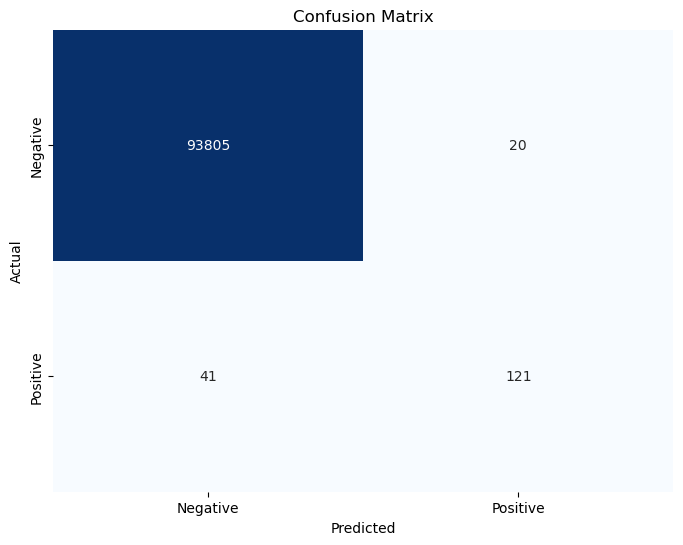

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.86      0.75      0.80       162

    accuracy                           1.00     93987
   macro avg       0.93      0.87      0.90     93987
weighted avg       1.00      1.00      1.00     93987

Accuracy: 0.999
Precision: 0.858
Recall: 0.747
F1-Score: 0.799
ROC-AUC: 0.873


In [16]:
evaluate(linear_svc)

__Доработка домашки__ Модель kNN

In [26]:
# я нашел на стаковерфлоу как игнорить ошибки не влияющие на расчеты и возникающие из-за драйверов и версий библиотек -__-
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_standarts, y_train)
y_pred = knn.predict(X_test_standarts)

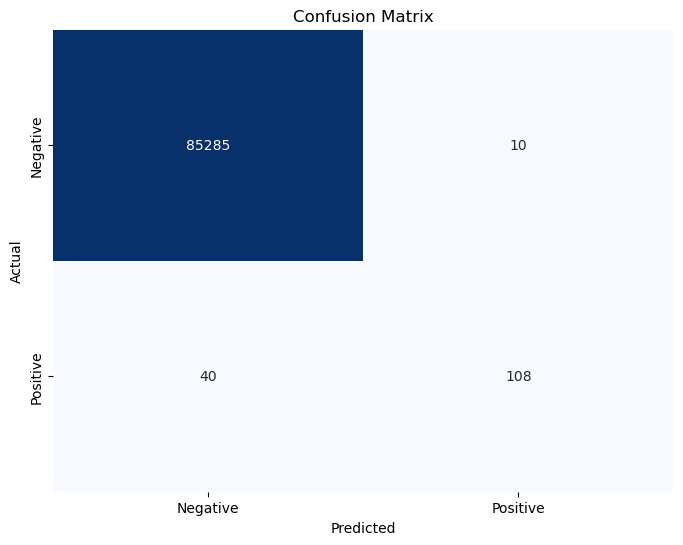

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.73      0.81       148

    accuracy                           1.00     85443
   macro avg       0.96      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.999
Precision: 0.915
Recall: 0.730
F1-Score: 0.812
ROC-AUC: 0.865


In [31]:
evaluate(knn)

In [27]:
classifiers = [lr, RF, linear_svc, knn] #для сравнения

dfs = []
for classifier in classifiers:
    metrics_result = evaluate(classifier, return_=True, conf_matrix=False)

    metrics_df = pd.DataFrame([metrics_result])

    dfs.append(metrics_df)

results_df1 = pd.concat(dfs, ignore_index=True)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy: 0.978
Precision: 0.066
Recall: 0.878
F1-Score: 0.123
ROC-AUC: 0.928
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 1.000
Precision: 0.957
Recall: 0.757
F1-Score: 0.845
ROC-AUC: 0.878
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.73      0.79       148

    accuracy              

,Model,accuracy,precision,recall,f1,roc_auc,tp,tn,fp,fn
0,LogisticRegression,0.979,0.067,0.878,0.125,0.929,83485,130,1810,18
1,RandomForestClassifier,1.000,0.957,0.757,0.845,0.878,85290,112,5,36
2,SVC,0.999,0.968,0.608,0.747,0.804,85292,90,3,58
3,KNeighborsClassifier,0.999,0.915,0.730,0.812,0.865,85285,108,10,40


Пересемплирование данных может улучшить работу модели

In [28]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)
X_over_standarts, y_over = ROS.fit_resample(X_train_standarts, y_train)

lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_over_standarts, y_over)
y_pred = lr.predict(X_test)
     

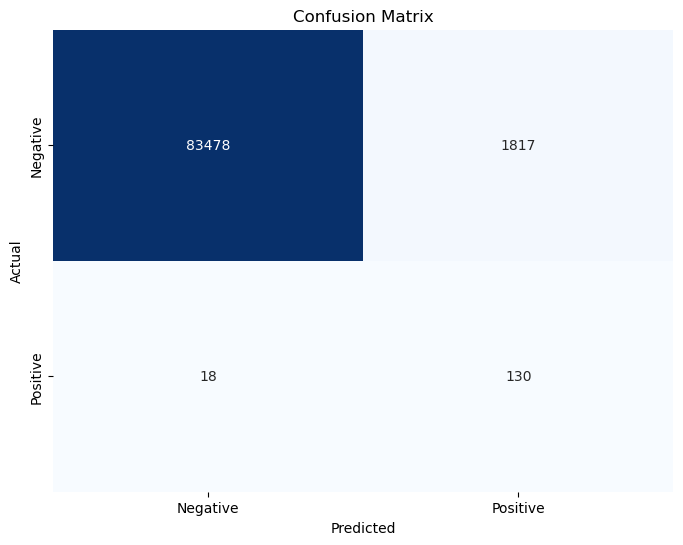

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy: 0.979
Precision: 0.067
Recall: 0.878
F1-Score: 0.124
ROC-AUC: 0.929


In [29]:
evaluate(lr)

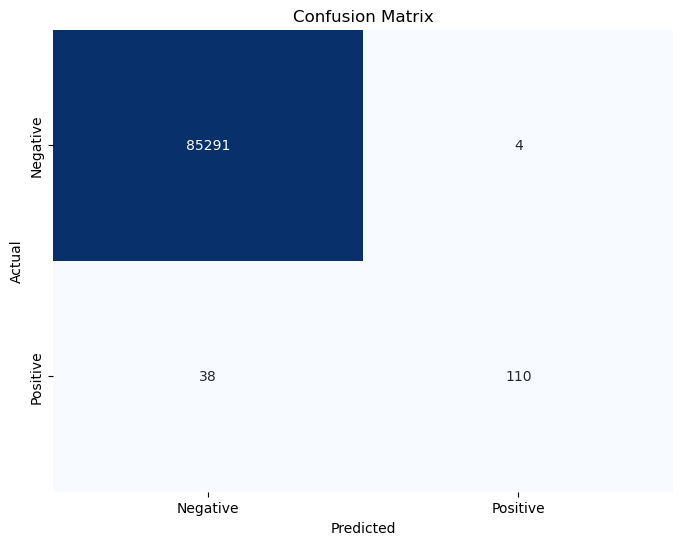

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.74      0.84       148

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 1.000
Precision: 0.965
Recall: 0.743
F1-Score: 0.840
ROC-AUC: 0.872


In [30]:
RF = RandomForestClassifier(random_state=42, n_jobs=-1)
RF.fit(X_over_standarts, y_over);
y_pred = RF.predict(X_test)
evaluate(RF)

In [ ]:
linear_svc = LinearSVC(random_state=42)
linear_svc.fit(X_over_standarts, y_over)
y_pred = linear_svc.predict(X_test)

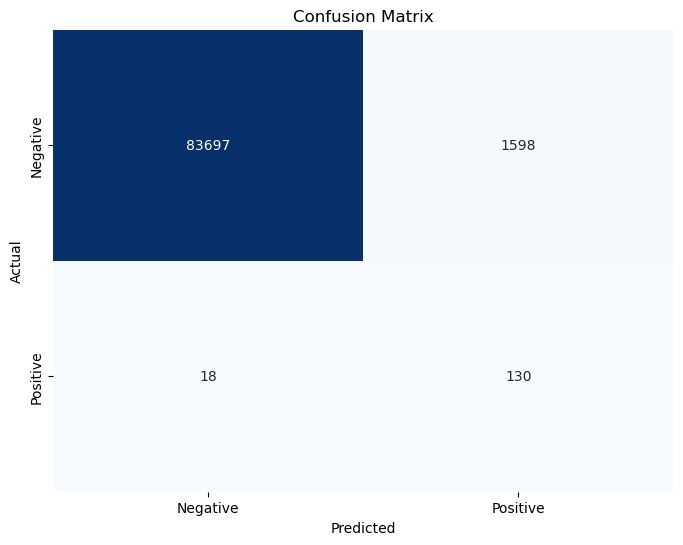

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.08      0.88      0.14       148

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy: 0.981
Precision: 0.075
Recall: 0.878
F1-Score: 0.139
ROC-AUC: 0.930


In [32]:
evaluate(linear_svc)

In [33]:
knn = KNeighborsClassifier()
knn.fit(X_over_standarts, y_over)
y_pred = knn.predict(X_test_standarts)

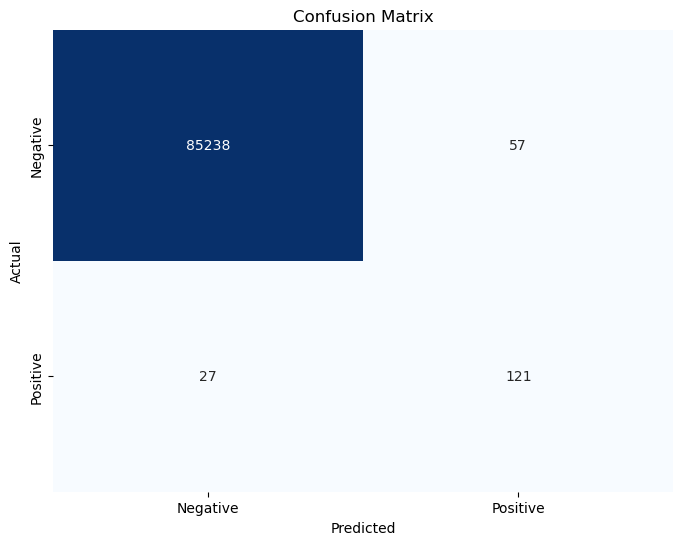

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.68      0.82      0.74       148

    accuracy                           1.00     85443
   macro avg       0.84      0.91      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.999
Precision: 0.680
Recall: 0.818
F1-Score: 0.742
ROC-AUC: 0.908


In [34]:
evaluate(knn)

In [35]:
classifiers = [lr, RF, linear_svc, knn]

dfs = []
for classifier in classifiers:
    metrics_result = evaluate(classifier, return_=True, conf_matrix=False)

    metrics_df = pd.DataFrame([metrics_result])

    dfs.append(metrics_df)

results_df2 = pd.concat(dfs, ignore_index=True)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy: 0.979
Precision: 0.067
Recall: 0.878
F1-Score: 0.124
ROC-AUC: 0.929
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.74      0.84       148

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 1.000
Precision: 0.965
Recall: 0.743
F1-Score: 0.840
ROC-AUC: 0.872
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.08      0.88      0.14       148

    accuracy              

In [36]:
results_df1 #до ресемплинга

,Model,accuracy,precision,recall,f1,roc_auc,tp,tn,fp,fn
0,LogisticRegression,0.978,0.066,0.878,0.123,0.928,83458,130,1837,18
1,RandomForestClassifier,1.000,0.957,0.757,0.845,0.878,85290,112,5,36
2,LinearSVC,0.999,0.850,0.730,0.785,0.865,85276,108,19,40
3,KNeighborsClassifier,0.999,0.915,0.730,0.812,0.865,85285,108,10,40


In [37]:
results_df2

,Model,accuracy,precision,recall,f1,roc_auc,tp,tn,fp,fn
0,LogisticRegression,0.979,0.067,0.878,0.124,0.929,83478,130,1817,18
1,RandomForestClassifier,1.000,0.965,0.743,0.840,0.872,85291,110,4,38
2,LinearSVC,0.981,0.075,0.878,0.139,0.930,83697,130,1598,18
3,KNeighborsClassifier,0.999,0.680,0.818,0.742,0.908,85238,121,57,27


__Выводы__
1. До ресемплинга:  
   Логическая регрессия имеет метрики: точность 7% полнота 88%.  
   Случайный лес: точность 96%, полнота 76%.  
   Линейный метод опорных векторов: точность 85%, полнота 73%.   
   Метод k-ближайших соседей: точность 91%, полнота 73%  
2. После передискретизации, метрики логической регрессии почти не изменились, алгоритм случайного леса начал выдавать лучший результат, точность LinearSVC значительно упала (для него необходима большая выборка), точность kNN упала, в последних случаях выросла полнота.
3. Модель логической регрессии содержит меньшую выборку, поэтому меньше подходит для такого исследования. В таком случае в сравнении всех моделей побеждает модель __случайного леса__, ресемплинг данных для неё улучшает точность, для остальных алгоритмов ресемплинг влияет отрицательно. Однако если не проводить дискретизацию, модели случайного леса  и k-ближайших соседей выдают примерно одинаковые результаты. Для наглядности, LinearSVC можно было бы заменить алгоритмом SVC, однако мой компьютер не потянул такие расчеты